## **Analysing the bank customer data and need to build a model which predicts the customer churn.**

Loading the required Libraries:

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report

Loading the data

In [ ]:
data=pd.read_csv("/content/drive/My Drive/insofe final/Data/BankCustomerChurn.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Preparing the data

In [ ]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values so no imputation is needed

Since row number and customer Id has no significance in analysing the data so these columns can be removed.

In [ ]:
a=data.drop(['RowNumber','CustomerId'],axis=1,inplace=False)
a

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
a.Surname.nunique()

2932

In [ ]:
a.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


DATA VISUALISATION AND INTERPRETATION

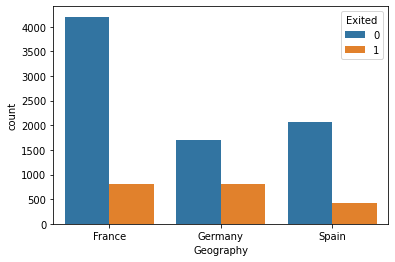

In [ ]:
sns.countplot(x='Geography', hue = 'Exited',data = a)

Majority of the customers from France. However, the proportion of churned customers is with inversely related to the population of customers to the bank.

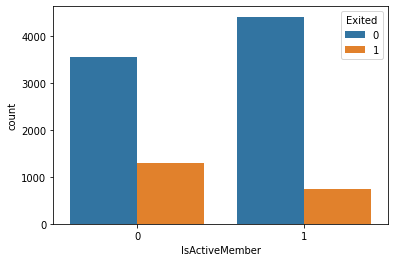

In [ ]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = a)

As we already know the inactive members have a greater churn. But the point is the bank having inactive customers greater than the limit.And the bank has to focus more on these people to reduce the customer churn.

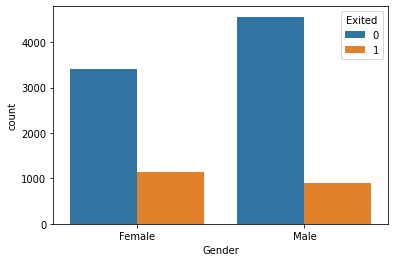

In [ ]:
sns.countplot(x='Gender', hue = 'Exited',data = a)

The proportion of female customers churning is also greater than that of male customers

CHANGING THE DATA INTO REQUIRED DATATYPES

In [ ]:
a.dtypes

Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

OBSERVING THE DATA PATTERNS USING CORR()

In [ ]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

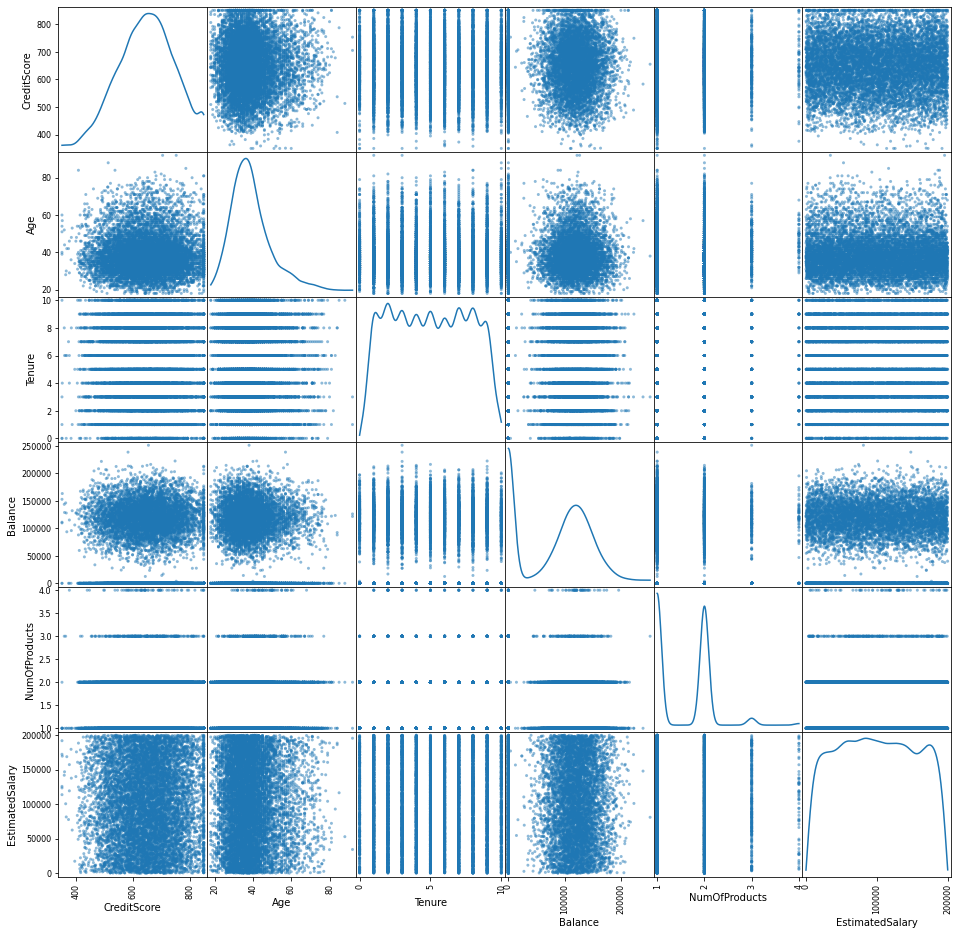

In [ ]:
pd.plotting.scatter_matrix(a, figsize=(16, 16), diagonal='kde')
plt.show()

In [ ]:
a['Exited'].replace({0:  'No',1:   'Yes'},inplace=True)

In [ ]:
a.drop('Surname',axis=1,inplace=True)

GETTING THE DUMMIES TO EXISTING DATA

In [ ]:
col={'Geography','Gender','HasCrCard','IsActiveMember'}
h=pd.get_dummies(columns=col,data=a,drop_first=True)

In [ ]:
h.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,HasCrCard_1,Gender_Male,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,Yes,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,No,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,Yes,0,0,1,0,0
3,699,39,1,0.00,2,93826.63,No,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,No,0,1,1,0,1


In [ ]:
pd.value_counts(h['Exited'].values)

No     7963
Yes    2037
dtype: int64

#BUILDING THE MODEL USING DECISIONTREES

Performing train test split on the data

In [ ]:

X, y = h.loc[:,h.columns!='Exited'], h.loc[:,'Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

No     5980
Yes    1520
Name: Exited, dtype: int64
No     1983
Yes     517
Name: Exited, dtype: int64


In [ ]:
y_train.dtypes

dtype('O')

In [ ]:
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')
clf = clf.fit(X_train, y_train)

In [ ]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
np.argsort(clf.feature_importances_)

array([ 0,  2,  5,  6,  7,  8,  9,  3, 10,  4,  1])

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([X.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10
0,Age,NumOfProducts,IsActiveMember_1,Balance,Gender_Male,HasCrCard_1,Geography_Spain,Geography_Germany,EstimatedSalary,Tenure,CreditScore
1,0.515748,0.333561,0.134667,0.0160241,0,0,0,0,0,0,0


In [ ]:
def plottree(m1):
    labels=X.columns
    graph = Source(export_graphviz(m1, out_file=None,feature_names=labels, class_names=['Yes', 'No',] ,filled = True))
    display(SVG(graph.pipe(format='svg')))

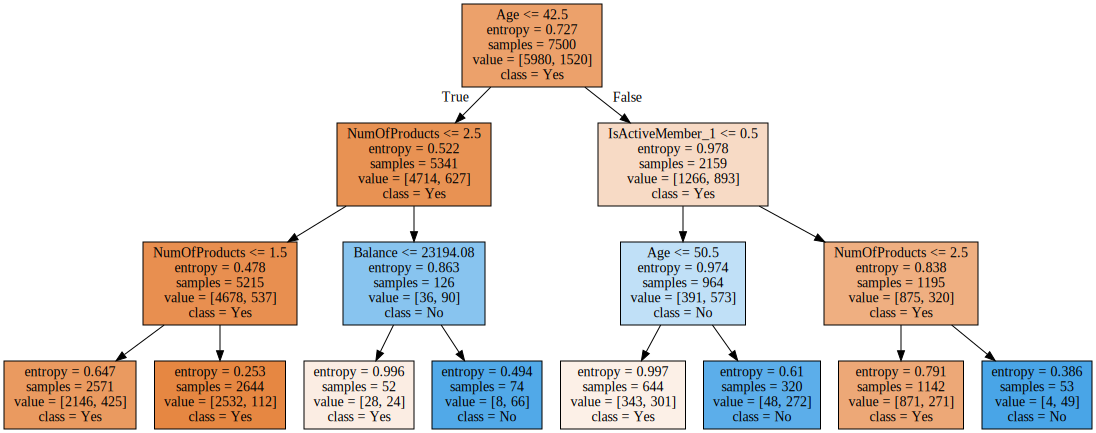

In [ ]:
plottree(clf)

BALANCING THE CLASSES

In [ ]:
clf = DecisionTreeClassifier(class_weight='balanced')
clf = clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [ ]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[5980    0]
 [   0 1520]]
[[1733  250]
 [ 254  263]]


In [ ]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0


In [ ]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.8739283913262733
Test TPR:  0.5087040618955513
Test Accuracy:  0.7984


In [ ]:

print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

          No       0.87      0.87      0.87      1983
         Yes       0.51      0.51      0.51       517

    accuracy                           0.80      2500
   macro avg       0.69      0.69      0.69      2500
weighted avg       0.80      0.80      0.80      2500



From the above results, my main aim is to predict the customers that will possibly churn so that they can be put in some other scheme to prevent churn hence the recall measures on the 1's is of more importance to me than the overall accuracy score of the model.

On testing the data I got the recall of 0.51 for depth of 3. And if we increase the depth it leads to overfitting of the model and even the results are not effecting too much.

I feel this might be the model which could possibly predict the customers churn.